In [3]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sea
import matplotlib.ticker as mtick
%matplotlib inline

In [4]:
#accessing the data
file_path_01 = 'zippedData/bom.movie_gross.csv.gz'
file_path_02 = 'zippedData/rt.movie_info.tsv.gz'
file_path_03 = 'zippedData/rt.reviews.tsv.gz'
file_path_04 = 'zippedData/tmdb.movies.csv.gz'
file_path_05 = 'zippedData/tn.movie_budgets.csv.gz'
bom_movie_gross = pd.read_csv(file_path_01)
rt_movie_info = pd.read_csv(file_path_02, sep="\t", index_col = 0)
#rt_reviews = pd.read_csv(file_path_03, sep = "\t")
tmdb_movies =pd.read_csv(file_path_04, index_col = 0)
tn_movie_budgets = pd.read_csv(file_path_05, index_col = 0)
db = 'im.db'
conn = sqlite3.connect(db)

+ scouting the data as we identify key information and having an overview of what we'll be working with.

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
rt_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

In [10]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
# now that we have a general overview,let's start working on the IMDB Data
#we start using the IMDB data
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
     USING(movie_id)
ORDER BY averagerating DESC
""", conn)

In [12]:
highest_rated.head(25)

,original_title,genres,averagerating,numvotes
0,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,5
1,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5
3,Hercule contre Hermès,Documentary,10.0,5
4,I Was Born Yesterday!,Documentary,10.0,6
5,Dog Days in the Heartland,Drama,10.0,5
6,Revolution Food,Documentary,10.0,8
7,Fly High: Story of the Disc Dog,Documentary,10.0,7
8,All Around Us,Documentary,10.0,6
9,Atlas Mountain: Barbary Macaques - Childcaring...,Documentary,10.0,5


In [13]:
print(highest_rated['numvotes'].mean())
#arbitrarily choose 2000

3523.6621669194105


In [14]:
# let's now look for the highest rated movies
# we sieve through by picking numvotes be greater than 2000
print(highest_rated['numvotes'].mean())
#we'll arbitrarily choose 2000
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes > 2000
ORDER BY averagerating DESC
""", conn)
highest_rated.head(25)

3523.6621669194105


,original_title,genres,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600
1,Ekvtime: Man of God,"Biography,Drama,History",9.6,2604
2,Aloko Udapadi,"Drama,History",9.5,6509
3,Peranbu,Drama,9.4,9629
4,Dag II,"Action,Drama,War",9.3,100568
5,Aynabaji,"Crime,Mystery,Thriller",9.3,18470
6,Wheels,Drama,9.3,17308
7,Natsamrat,"Drama,Family",9.2,4297
8,C/o Kancharapalem,Drama,9.2,2195
9,CM101MMXI Fundamentals,"Comedy,Documentary",9.2,41560


In [15]:
movie_basics['primary_title'].duplicated().sum()
# 10073 is the total movies duplicated despite having different movie ID's

10073

In [16]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


movie_id is the primary key and there are 146,144 movies
We narrowed down our scope to the US only .

In [17]:
#we are going to narrow down our scope to the US region and language as  English to eliminate documentaries.
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes, region
FROM movie_basics
INNER JOIN movie_ratings
    USING(movie_id)
INNER JOIN movie_akas
    USING(movie_id)
WHERE numvotes > 2000 AND genres NOT LIKE "%Documentary%" AND region = "US"
ORDER BY averagerating DESC
""", conn)
highest_rated.drop_duplicates(subset = 'original_title', inplace=True)
highest_rated.head(25)

,original_title,genres,averagerating,numvotes,region
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,US
2,Peranbu,Drama,9.4,9629,US
3,Wheels,Drama,9.3,17308,US
4,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,US
8,Kill Bill: The Whole Bloody Affair,"Action,Crime,Thriller",8.8,3406,US
9,Avengers: Endgame,"Action,Adventure,Sci-Fi",8.8,441135,US
12,96,"Drama,Romance",8.8,10903,US
13,Super Deluxe,"Action,Crime,Drama",8.8,2254,US
14,Mahanati,"Biography,Drama",8.7,6917,US
15,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,US


Since we limited the data to US we are obligated to limit the gross as well

In [18]:
bom_movie_gross.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


we are now coming acros NaN issues.we shall figure out how to remove them once we check the severity

In [19]:
# NaN
bom_movie_gross.isna().sum()
bom_movie_gross.drop('foreign_gross', axis=1 , inplace=True)

In [20]:
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross = bom_movie_gross.sort_values('domestic_gross', ascending=False)
bom_movie_gross

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
...,...,...,...,...
1018,Apartment 143,Magn.,400.0,2012
2757,Satanic,Magn.,300.0,2016
2756,News From Planet Mars,KL,300.0,2016
2321,The Chambermaid,FM,300.0,2015


In [21]:
gross_and_rating_df = bom_movie_gross.merge(highest_rated, how='inner', left_on='title', right_on='original_title')
gross_and_rating_df.head(25)
gross_and_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1406
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1407 non-null   object 
 1   studio          1407 non-null   object 
 2   domestic_gross  1407 non-null   float64
 3   year            1407 non-null   int64  
 4   original_title  1407 non-null   object 
 5   genres          1407 non-null   object 
 6   averagerating   1407 non-null   float64
 7   numvotes        1407 non-null   int64  
 8   region          1407 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 109.9+ KB


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='averagerating', ylabel='domestic_gross'>

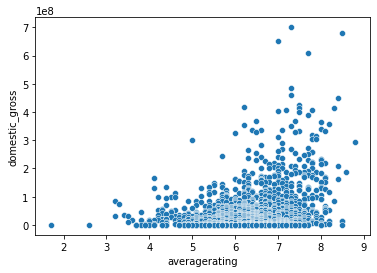

In [22]:
#gathering a rough overview 
y = gross_and_rating_df['domestic_gross']
x = gross_and_rating_df['averagerating']
sea.scatterplot(x, y)

In [23]:
genres_df = gross_and_rating_df['genres']
genres_df = genres_df.str.split(',')
genres_list_all = genres_df.tolist()
genres_dict_all = {}
for x in genres_list_all:
    for y in x:
        if y not in genres_dict_all:
            genres_dict_all[y] = 1
        else:
            genres_dict_all[y] += 1

In [24]:
genres_df = gross_and_rating_df['genres'].iloc[:200]
genres_df = genres_df.str.split(',')
genres_list = genres_df.tolist()
genres_dict = {}
for x in genres_list:
    if y not in genres_dict:
        genres_dict[y] = 1
    else:
        genres_dict[y] += 1

In [25]:
genres_series = pd.Series(genres_dict_all)
genres_series.sort_values(ascending=False, inplace=True)
genres_series

Drama        763
Comedy       562
Action       384
Adventure    319
Thriller     237
Romance      231
Crime        213
Horror       155
Biography    132
Mystery      124
Fantasy      107
Sci-Fi       102
Animation     91
Family        67
History       41
Music         39
Sport         28
War           12
Western       11
Musical        5
dtype: int64

<AxesSubplot:>

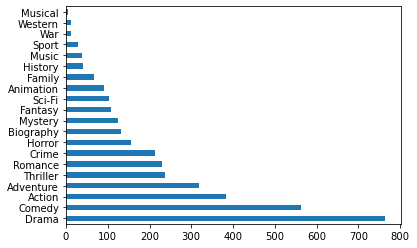

In [26]:
genres_series_all = pd.Series(genres_dict_all)
genres_series_all.sort_values(ascending=False,  inplace=True)
genres_series_all.plot.barh()

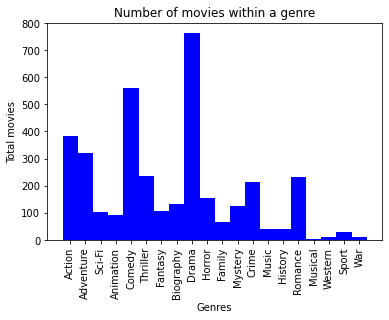

In [27]:
width = 1
plt.bar(genres_dict_all.keys(), genres_dict_all.values(), width, color='blue')
plt.title('Number of movies within a genre')
plt.xlabel('Genres')
plt.ylabel('Total movies')
plt.xticks(rotation = 90);

Based on the graph above:
The first recommendation would be to make an,action,adventure,Drama, comedy film


we shall narrow down our data further to 2016, 2017 and 2018 that have great results

In [28]:
# let's now combine tables and decipher

tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
tn_movie_budgets_current = tn_movie_budgets.sort_values('release_date', ascending=False)
release_date = pd.to_datetime(tn_movie_budgets_current['release_date'])
tn_movie_budgets_current['release_date'] = release_date
tn_movie_budgets_current.sort_values('release_date', ascending = False, inplace = True)
tn_movie_budgets_current.head(25)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
95,2020-12-31,Moonfall,"$150,000,000",$0,$0
36,2020-02-21,Call of the Wild,"$82,000,000",$0,$0
30,2019-12-31,Reagan,"$25,000,000",$0,$0
81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
72,2019-12-31,355,"$75,000,000",$0,$0
13,2019-12-31,Rogue City,"$13,000,000",$0,$0
16,2019-12-31,Eli,"$11,000,000",$0,$0
44,2019-12-31,Down Under Cover,"$40,000,000",$0,$0


In [30]:
# the too recent ones will have to be dropped since they have $0 listed
tn_movie_budgets_current.drop(index=tn_movie_budgets_current.index[:20], axis=0, inplace=True)
tn_movie_budgets_current.head(25)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
42,2019-06-14,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000"
98,2019-06-14,Shaft,"$30,000,000","$600,000","$600,000"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
35,2019-06-07,Late Night,"$4,000,000","$246,305","$246,305"
25,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941"
66,2019-05-31,MA,"$5,000,000","$36,049,540","$44,300,625"
96,2019-05-17,The Sun is Also a Star,"$9,000,000","$4,950,029","$5,434,029"
26,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233"
76,2019-05-10,PokÃ©mon: Detective Pikachu,"$150,000,000","$139,507,806","$411,258,433"


In [31]:
#movies with more than 2000 votes and remove documentaries as before
latest_imdb = pd.read_sql("""
SELECT original_title, start_year, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
     USING(movie_id)
WHERE numvotes > 2000 AND genres NOT LIKE "%Documentary%"
ORDER BY start_year DESC, averagerating DESc
""", conn
)
latest_imdb.head(25)

,original_title,start_year,genres,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600
1,Avengers: Endgame,2019,"Action,Adventure,Sci-Fi",8.8,441135
2,Super Deluxe,2019,"Action,Crime,Drama",8.8,2254
3,Uri: The Surgical Strike,2019,"Action,Drama,War",8.6,30292
4,Yatra,2019,"Biography,Drama",8.6,2913
5,The Tashkent Files,2019,"Drama,Mystery,Thriller",8.4,3175
6,Gully Boy,2019,"Drama,Music",8.3,17483
7,Badla,2019,"Crime,Drama,Mystery",8.1,9988
8,John Wick: Chapter 3 - Parabellum,2019,"Action,Crime,Thriller",8.0,81568
9,Maharshi,2019,"Action,Drama",8.0,2733


In [32]:
recent_merge = tn_movie_budgets_current.merge(latest_imdb, how='inner', left_on='movie', right_on='original_title')
recent_merge.sort_values('release_date', ascending =False, inplace=True)
recent_merge.head(25)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,"$40,000,000","$30,202,860","$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
6,2019-04-05,Pet Sematary,"$21,000,000","$54,724,696","$109,501,146",Pet Sematary,2019,"Horror,Mystery,Thriller",6.0,34472
8,2019-04-05,Shazam!,"$85,000,000","$139,606,856","$362,899,733",Shazam!,2019,"Action,Adventure,Comedy",7.4,109051
9,2019-03-29,Unplanned,"$6,000,000","$18,107,621","$18,107,621",Unplanned,2019,"Biography,Drama",6.3,5945
10,2019-03-29,Dumbo,"$170,000,000","$113,883,318","$345,004,422",Dumbo,2019,"Adventure,Family,Fantasy",6.6,25072
11,2019-03-22,Us,"$20,000,000","$175,006,930","$254,210,310",Us,2019,"Horror,Mystery,Thriller",7.1,102511


In [33]:
# most profitable movies( domestic gross - budget) of the last 3 years for 400 movies
recent_df = recent_merge.drop(index=recent_merge.index[400:], axis=0)
recent_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,"$170,000,000","$85,576,941","$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,"$40,000,000","$30,202,860","$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
...,...,...,...,...,...,...,...,...,...,...
406,2015-11-25,Victor Frankenstein,"$40,000,000","$5,775,076","$31,124,367",Victor Frankenstein,2015,"Drama,Horror,Sci-Fi",6.0,47492
405,2015-11-25,Creed,"$37,000,000","$109,767,581","$173,567,581",Creed,2015,"Drama,Sport",7.6,224671
411,2015-11-20,Legend,"$25,000,000","$1,872,994","$42,425,450",Legend,2015,"Biography,Crime,Drama",7.0,138947
410,2015-11-20,Carol,"$11,800,000","$12,711,491","$42,843,521",Carol,2015,"Drama,Romance",7.2,100680


In [34]:
#removing $ and commas
recent_df['domestic_gross'] = recent_df['domestic_gross'].str.strip('$')
recent_df['production_budget'] = recent_df['production_budget'].str.strip('$')
recent_df['domestic_gross'] = recent_df['domestic_gross'].str.replace(',','')
recent_df['production_budget'] = recent_df['production_budget'].str.replace(',','')
recent_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes
0,2019-06-07,Dark Phoenix,350000000,42762350,"$149,762,350",Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451
1,2019-05-31,Godzilla: King of the Monsters,170000000,85576941,"$299,276,941",Godzilla: King of the Monsters,2019,"Action,Adventure,Fantasy",6.7,36479
2,2019-05-10,The Professor and the Madman,25000000,0,"$5,227,233",The Professor and the Madman,2019,"Biography,Drama,Mystery",7.4,10383
3,2019-05-03,Long Shot,40000000,30202860,"$43,711,031",Long Shot,2019,"Comedy,Romance",7.2,12814
4,2019-04-12,Hellboy,50000000,21903748,"$40,725,492",Hellboy,2019,"Action,Adventure,Fantasy",5.4,19534
...,...,...,...,...,...,...,...,...,...,...
406,2015-11-25,Victor Frankenstein,40000000,5775076,"$31,124,367",Victor Frankenstein,2015,"Drama,Horror,Sci-Fi",6.0,47492
405,2015-11-25,Creed,37000000,109767581,"$173,567,581",Creed,2015,"Drama,Sport",7.6,224671
411,2015-11-20,Legend,25000000,1872994,"$42,425,450",Legend,2015,"Biography,Crime,Drama",7.0,138947
410,2015-11-20,Carol,11800000,12711491,"$42,843,521",Carol,2015,"Drama,Romance",7.2,100680


In [35]:
#converting to int
recent_df['domestic_gross'] = recent_df['domestic_gross'].astype(int)
recent_df['production_budget'] = recent_df['production_budget'].astype(int)
recent_df['profit'] = recent_df['domestic_gross'] - recent_df['production_budget']
recent_df.sort_values('profit', ascending=False, inplace=True)
recent_df.head(25)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,genres,averagerating,numvotes,profit
117,2018-02-16,Black Panther,200000000,700059566,"$1,348,258,224",Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148,500059566
217,2017-03-17,Beauty and the Beast,160000000,504014165,"$1,259,199,706",Beauty and the Beast,2017,"Family,Fantasy,Musical",7.2,238325,344014165
133,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,"$964,496,193",Jumanji: Welcome to the Jungle,2017,"Action,Adventure,Comedy",7.0,242735,314508916
370,2016-02-12,Deadpool,58000000,363070709,"$801,025,593",Deadpool,2016,"Action,Adventure,Comedy",8.0,820847,305070709
311,2016-07-08,The Secret Life of Pets,75000000,368384330,"$886,750,534",The Secret Life of Pets,2016,"Adventure,Animation,Comedy",6.5,161997,293384330
164,2017-09-08,It,35000000,327481748,"$697,457,969",It,2017,"Horror,Thriller",7.4,359123,292481748
321,2016-06-17,Finding Dory,200000000,486295561,"$1,021,215,193",Finding Dory,2016,"Adventure,Animation,Comedy",7.3,213542,286295561
188,2017-06-02,Wonder Woman,150000000,412563408,"$821,133,378",Wonder Woman,2017,"Action,Adventure,Fantasy",7.5,487527,262563408
15,2019-03-08,Captain Marvel,175000000,426525952,"$1,123,061,550",Captain Marvel,2019,"Action,Adventure,Sci-Fi",7.0,296225,251525952
90,2018-05-18,Deadpool 2,110000000,324591735,"$786,680,557",Deadpool 2,2018,"Action,Adventure,Comedy",7.8,391735,214591735


In [36]:
#from the above you can notice that even the movies that make the higest profit don't have the higest rating 
#remove the negatives for movies that made no profit
recent_profit = recent_df[recent_df['profit']>0]


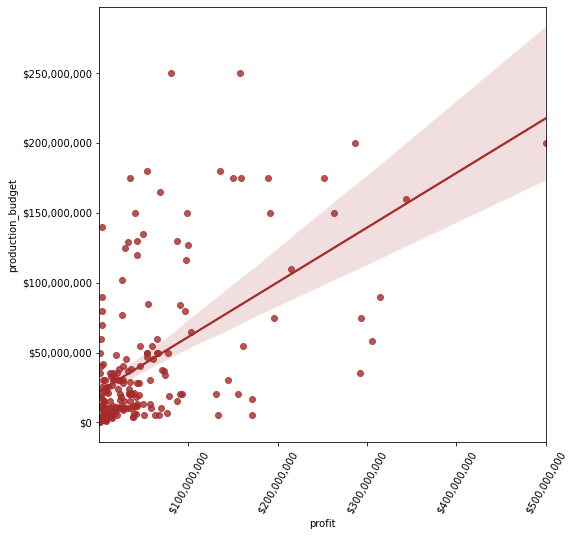

In [37]:
# plot a graph to show the relationship
fig, ax = plt.subplots(figsize=(8, 8))
sea.regplot(data=recent_profit, x='profit', y='production_budget',color='brown', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)
plt.xticks(rotation=60)
plt.show()

so we lack a relationship between the budget and profit

In [38]:
recent_profit['production_budget'].mean()

43194427.083333336

## Recommended budget turns out to be a target of $43,000,000
we shall now focus on crowd pulling and determine higest rating using person_id and get it

In [39]:
person_df = pd.read_sql("""
SELECT p.primary_name,
       mr.averagerating,
       COUNT(DISTINCT mb.primary_title) num_movies
FROM directors d
JOIN persons p
    USING(person_id)
JOIN principals
    USING(movie_id)
JOIN movie_basics mb
    USING(movie_id)
JOIN movie_ratings mr
    USING(movie_id)
WHERE numvotes > 3000
GROUP BY p.primary_name
HAVING num_movies > 5
""", conn)
person_df


,primary_name,averagerating,num_movies
0,A.R. Murugadoss,6.8,7
1,Adam Wingard,5.3,8
2,Alex Gibney,7.3,8
3,Anurag Kashyap,8.1,9
4,Baltasar Kormákur,6.6,6
5,Ben Wheatley,5.6,6
6,Clint Eastwood,6.5,7
7,Darren Lynn Bousman,6.4,7
8,David Gordon Green,6.4,8
9,Denis Villeneuve,8.3,6


In [40]:
person_df.drop_duplicates(inplace=True)
person_df.sort_values('averagerating', ascending=False, inplace=True)
person_df.head(25)

,primary_name,averagerating,num_movies
9,Denis Villeneuve,8.3,6
3,Anurag Kashyap,8.1,9
21,Ridley Scott,8.0,7
32,Tim Story,7.4,7
30,Takashi Miike,7.4,6
29,Steven Spielberg,7.4,7
12,Hirokazu Koreeda,7.4,6
2,Alex Gibney,7.3,8
15,Kevin Macdonald,7.2,6
34,Werner Herzog,7.2,6


To filter out(outliers) the directors we've decided to only include directors who have more than 5 movies and each has to have more than 3000 votes
#we shall use this list to select a director for any film 

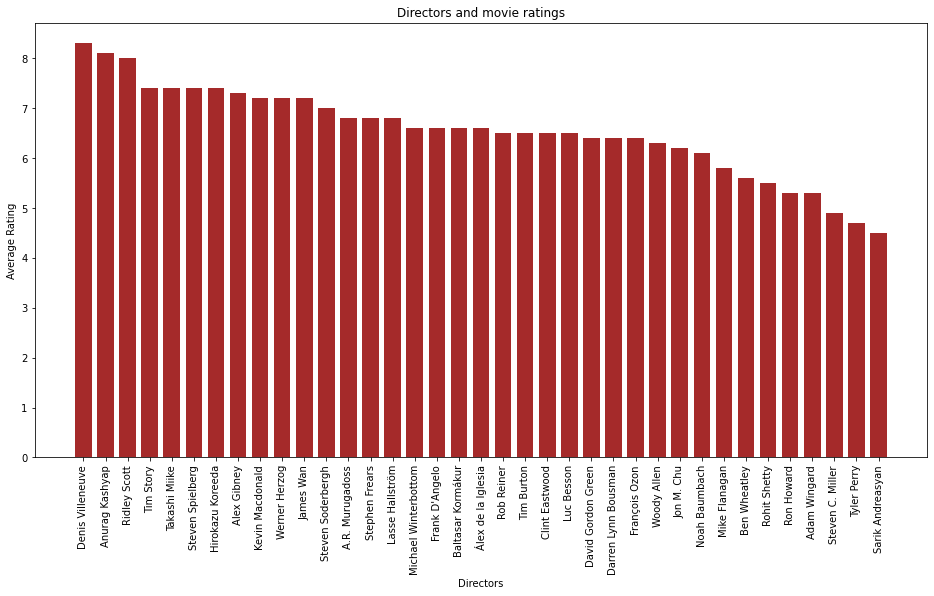

In [106]:
x = person_df['primary_name']
y = person_df['averagerating']
plt.figure(figsize=(16, 8))
plt.bar(x, y, width=.75, color='brown')
plt.title('Directors and movie ratings')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90);

From the graph above,we were able to obtain the Directors we'd highly recommend:
+ Denis Villeneuve	8.3	
+ Anurag Kashyap	8.1	
+ Ridley Scott      8.0

# Conclusion
I used ratings and profit to come up with our mesurement of success 
and we determined that 
 Microsoft should:
+ Make a Drama,Action,Comedy film
+ Use a budget above $43,000,000
+ To obtain the best result,we recommend use of either the top 3 directors as stated above.